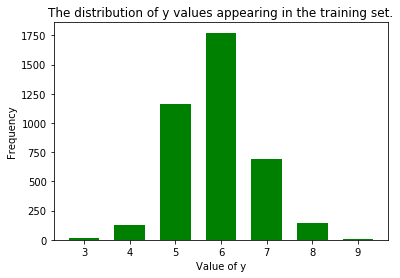

Mean squared error is:  0.7767772386501117


In [5]:
#This Script shows Analysis of Linear Regression Techniques Applied to 
#Wine Quality Data:'https://archive.ics.uci.edu/ml/datasets/Wine+Quality'

#Importing Libaries and Loading Data

import _pickle as cp
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

X, y = cp.load(open('winequality-white.pickle','rb'))

#Assigning Training/Test Data

N, D = X.shape
N_train = int(0.8 * N)
N_test = N - N_train
X_train = X[:N_train]
y_train = y[:N_train]
X_test = X[N_train:]
y_test = y[N_train:]

#Bar graph showing y value distribution in dataset with mean squared error shown below

(vals,counts)=np.unique(y_train,return_counts=True)
width_col= 2/3

plt.bar(vals, counts, width_col, color="green")
plt.ylabel('Frequency')
plt.xlabel('Value of y')
plt.title('The distribution of y values appearing in the training set.')

plt.show()

y_av_MSE = np.mean(np.square(y_train-np.mean(y_train)))

print("Mean squared error is: ", y_av_MSE)



In [2]:
#Normalizing Data

X_means = np.mean(X_train,axis=0)
X_stds = np.std(X_train,axis=0)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

X_train_std = (X_train-X_means)/X_stds

X_test_std = (X_test-X_means)/X_stds

#Applying Linear Regression 

_x = np.concatenate((np.ones((1,N_train)).T,X_train_std),axis=1)

w=np.linalg.solve(np.matmul(_x.T,_x),np.matmul(_x.T,y_train))

y_train_hat = np.matmul(_x,w)
y_test_hat = np.matmul(np.concatenate((np.ones((1,N_test)).T,X_test_std),axis=1),w)

y_train_MSE = np.mean(np.square(y_train-y_train_hat))
y_test_MSE = np.mean(np.square(y_test-y_test_hat))
                      
print("Using linear regression model:", 
      '\n',
      "Mean squared error on TRAINING data: ",
      y_train_MSE,
      '\n',
      "Mean squared error on TEST data: ",
      y_test_MSE)           



Using linear regression model: 
 Mean squared error on TRAINING data:  0.5639996173941924 
 Mean squared error on TEST data:  0.5607292042283472


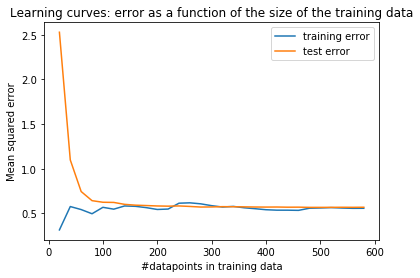

In [3]:
#Plotting Learning Curves - error as a function of the size of training data

ys_t = []
ys_test = []
xs=[]
for x in range(20, 600, 20):
    X_t = X[:x]
    y_t = y[:x]
    
    w_t=np.linalg.solve(np.matmul(X_t.T,X_t),np.matmul(X_t.T,y_t))
    y_t_hat = np.matmul(X_t,w_t)
    y_test_hat = np.matmul(X_test,w_t)

    y_t_MSE = np.mean(np.square(y_t-y_t_hat))
    y_test_MSE = np.mean(np.square(y_test-y_test_hat))
    
    xs.append(x)
    ys_t.append(y_t_MSE)
    ys_test.append(y_test_MSE)
	
    
plt.plot(xs,ys_t, label='training error')
plt.plot(xs,ys_test, label='test error')
plt.legend(loc='upper right')
plt.ylabel('Mean squared error')
plt.xlabel('#datapoints in training data')
plt.title('Learning curves: error as a function of the size of the training data')

plt.show()



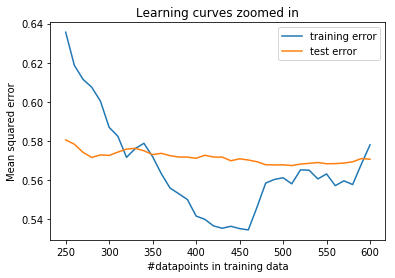

In [4]:
#Zooming in on Learning Curves in range of 250-600 datapoints

ys_t = []
ys_test = []
xs=[]
for x in range(250, 601, 10):
    X_t = X[:x]
    y_t = y[:x]
    
    w_t=np.linalg.solve(np.matmul(X_t.T,X_t),np.matmul(X_t.T,y_t))
    y_t_hat = np.matmul(X_t,w_t)
    y_test_hat = np.matmul(X_test,w_t)

    y_t_MSE = np.mean(np.square(y_t-y_t_hat))
    y_test_MSE = np.mean(np.square(y_test-y_test_hat))
    
    xs.append(x)
    ys_t.append(y_t_MSE)
    ys_test.append(y_test_MSE)
    
    
plt.plot(xs,ys_t, label='training error')
plt.plot(xs,ys_test, label='test error')
plt.legend(loc='upper right')
plt.ylabel('Mean squared error')
plt.xlabel('#datapoints in training data')
plt.title('Learning curves zoomed in')

plt.show()

#This graph suggests that the amount of data required for optimal test error is 
#around 280 as the MSE on the test data does no reduce much beyond this point as 
#more data is added.

#I do not think this model is underfitting as the MSE on the training data stays
#low as the data size increases.